### **Modelos predictivos**

#### Modelo para predecir los valores nulos de la columna "Power"

#### **Librerias:**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from joblib import dump, load
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve

- Importamos el dataset

In [4]:
original = pd.read_csv('coches-de-segunda-mano-sample.csv')
df = original.copy()

In [5]:
df.sample(5)

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
20426,0ca8c77e59b444b7474c639e015c2485,9881bcdd5a0ad4733037b3fb25e69c3a,NISSAN,QASHQAI,NISSAN QASHQAI 5p.,8400,NaN,Diésel,2009.0,57000,...,5,Manual,Gris / Plata,0,False,70483b6e100c9cebbffcdc62dea07eda,Ávila,Spain,2020-12-18 16:50:46,2021-01-15 00:00:00
26652,0ed041b481200774167198e3cc47f73c,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 2 Gran Tourer,BMW Serie 2 Gran Tourer 216d 5p.,15490,13990.0,Diésel,2016.0,117000,...,5,Manual,Azul,40,True,Flexicar Sevilla,Sevilla,Spain,2021-01-12 19:27:39,2021-01-15 00:00:00
33315,990b7f0369404f4ccf2b3eee1ca4f6cb,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Arona,SEAT Arona 1.0 TSI 70kW 95CV Style Ecomotive 5p.,18590,NaN,Gasolina,2020.0,1496,...,5,Manual,B4F5 Blanco (sÃ³lido) Techo Naranja,11,True,Blau Motors,Baleares,Spain,2021-01-07 16:28:56,2021-01-15 00:00:00
14971,5f9888dd3c28b0ee34f3cbcb22b7bfa2,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 3,BMW Serie 3 320I TOURING 5p.,1500,NaN,Gasolina,2000.0,200000,...,5,Manual,Negro,5,False,2091c76f726f21a61b6d2f8b885cc39d,Alicante,Spain,2020-11-15 09:37:45,2021-01-15 00:00:00
10939,5fbd26ab0078819cdb5736273f9624df,9881bcdd5a0ad4733037b3fb25e69c3a,FIAT,Qubo,FIAT Qubo Lounge 1.3 Multijet 70kW 95CV,10200,9800.0,Diésel,2017.0,16604,...,5,Manual,Blanco,22,True,GJ AUTOMOTIVE,Burgos,Spain,2021-01-02 17:59:51,2021-01-15 00:00:00


### **EDA**

In [6]:
df = df.drop(columns=["url","company","publish_date","insert_date","country","photos","dealer","province","is_professional","color","kms","price_financed"])
df_train = df.drop_duplicates()
df_train = df.dropna()

In [7]:
df_train.columns

Index(['make', 'model', 'version', 'price', 'fuel', 'year', 'power', 'doors',
       'shift'],
      dtype='object')

In [8]:
# Tu código
# Creamos el objeto que realizará la transformación

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df[['model','make','fuel','shift','version',]])
a=onehot.transform(df_train[['model','make','fuel','shift','version',]])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['model','make','fuel','shift','version']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['model','make','fuel','shift','version'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(41354, 18429)


,price,year,power,doors,model_10,model_100,model_100 NX,model_1007,model_100D,model_106,...,version_VOLVO XC90 D5 5p.,version_VOLVO XC90 D5 Executive 5p.,version_VOLVO XC90 D5 Kinetic 5p.,version_VOLVO XC90 D5 Momentum 5p.,version_VOLVO XC90 D5 RDesign Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Summum 5p.,version_VOLVO XC90 D5 Summum Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Volvo Ocean Race 5p.,version_VOLVO XC90 T6 Momentum 5p.,version_VOLVO XC90 V8 Executive 5p.
41051,21200,2018.0,150.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30578,3300,2007.0,110.0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27321,9000,2012.0,143.0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13453,29990,2015.0,258.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25362,13500,2012.0,140.0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Entrenamos modelo**

In [9]:
X= df_train.drop(columns=["power"],inplace=False)
y = df_train["power"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
modelo = RandomForestRegressor(n_estimators = 150, max_depth = 100, min_samples_split = 10)

estandarizador = StandardScaler()
estandarizador.fit(X_train)
X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)
modelo.fit(X_train_std,y_train)
predictions = modelo.predict(X_test_std)

In [12]:
X_train.columns

Index(['price', 'year', 'doors', 'model_10', 'model_100', 'model_100 NX',
       'model_1007', 'model_100D', 'model_106', 'model_107',
       ...
       'version_VOLVO XC90 D5 5p.', 'version_VOLVO XC90 D5 Executive 5p.',
       'version_VOLVO XC90 D5 Kinetic 5p.',
       'version_VOLVO XC90 D5 Momentum 5p.',
       'version_VOLVO XC90 D5 RDesign Auto 7 Asientos 5p.',
       'version_VOLVO XC90 D5 Summum 5p.',
       'version_VOLVO XC90 D5 Summum Auto 7 Asientos 5p.',
       'version_VOLVO XC90 D5 Volvo Ocean Race 5p.',
       'version_VOLVO XC90 T6 Momentum 5p.',
       'version_VOLVO XC90 V8 Executive 5p.'],
      dtype='object', length=18428)

### Graficamos el OVERFITTING

In [13]:
mse_test = mean_squared_error(predictions,y_test)
mse_test

533.543654173124

In [ ]:
mse_train = mean_squared_error(predictions, y_train)
mse_train

### Primer grafico de lineas con todas las variables

c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


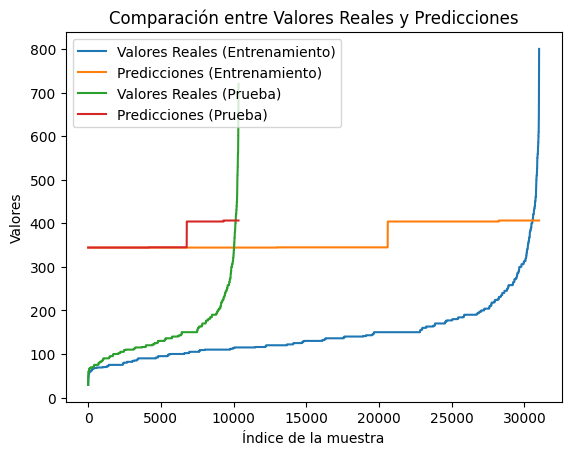

In [21]:
# Realiza predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Ordena los datos para el gráfico de líneas
sorted_indices_train = np.argsort(y_train)
sorted_indices_test = np.argsort(y_test)

# Crea un gráfico de líneas para visualizar las predicciones y los valores reales
plt.plot(np.arange(len(y_train)), np.sort(y_train), label='Valores Reales (Entrenamiento)')
plt.plot(np.arange(len(y_train)), np.sort(y_pred_train[sorted_indices_train]), label='Predicciones (Entrenamiento)')

plt.plot(np.arange(len(y_test)), np.sort(y_test), label='Valores Reales (Prueba)')
plt.plot(np.arange(len(y_test)), np.sort(y_pred_test[sorted_indices_test]), label='Predicciones (Prueba)')

plt.xlabel('Índice de la muestra')
plt.ylabel('Valores')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

In [24]:
train_sizes, train_scores, test_scores = learning_curve(modelo, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcula los promedios y las desviaciones estándar de los puntajes
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Crea el gráfico de curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Prueba")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curva de Aprendizaje")
plt.legend(loc="best")
plt.show()

KeyboardInterrupt: 

In [ ]:
dict = {"predictions":predictions, "y_test":y_test}
result= pd.DataFrame(dict)
result

,predictions,y_test
10435,139.774700,136.0
33798,222.289581,313.0
16067,227.563258,250.0
12429,92.479093,90.0
3622,176.875904,180.0
...,...,...
3199,115.330474,115.0
32254,132.985686,140.0
16554,104.095830,90.0
12273,145.032472,184.0


### **Evaluamos modelo**

In [ ]:
df_power = original[original["power"].isnull()]

In [ ]:
df_power.drop(columns=["url","company","publish_date","insert_date","country","photos","dealer","province","is_professional","color","kms","price_financed"], inplace = True)

C:\Users\GuillemEdoBertran\AppData\Local\Temp\ipykernel_3104\2239254573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power.drop(columns=["url","company","publish_date","insert_date","country","photos","dealer","province","is_professional","color","kms","price_financed"], inplace = True)


In [ ]:
df_power.columns

Index(['make', 'model', 'version', 'price', 'fuel', 'year', 'power', 'doors',
       'shift'],
      dtype='object')

In [ ]:
a=onehot.transform(df_power[['model','make','fuel','shift','version',]])

encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['model','make','fuel','shift','version']))

df_power.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

df_power=pd.concat([df_power,encoded_df],axis=1)

df_power.drop(columns=['model','make','fuel','shift','version'],inplace=True)

print(df_power.shape)
df_power.sample(5)

(8528, 18429)


,price,year,power,doors,model_10,model_100,model_100 NX,model_1007,model_100D,model_106,...,version_VOLVO XC90 D5 5p.,version_VOLVO XC90 D5 Executive 5p.,version_VOLVO XC90 D5 Kinetic 5p.,version_VOLVO XC90 D5 Momentum 5p.,version_VOLVO XC90 D5 RDesign Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Summum 5p.,version_VOLVO XC90 D5 Summum Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Volvo Ocean Race 5p.,version_VOLVO XC90 T6 Momentum 5p.,version_VOLVO XC90 V8 Executive 5p.
1123,3900,2004.0,NaN,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3977,4000,2005.0,NaN,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4367,1500,1999.0,NaN,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,4990,2004.0,NaN,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5017,300,1999.0,NaN,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_std = estandarizador.transform(df_power.drop(columns=['power'], inplace = False))

In [ ]:
predicciones = modelo.predict(df_power.drop(columns=['power'], inplace = False)) 

c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
df_power["power"] = predicciones

In [ ]:
df_power.sample(5)

,price,year,power,doors,model_10,model_100,model_100 NX,model_1007,model_100D,model_106,...,version_VOLVO XC90 D5 5p.,version_VOLVO XC90 D5 Executive 5p.,version_VOLVO XC90 D5 Kinetic 5p.,version_VOLVO XC90 D5 Momentum 5p.,version_VOLVO XC90 D5 RDesign Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Summum 5p.,version_VOLVO XC90 D5 Summum Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Volvo Ocean Race 5p.,version_VOLVO XC90 T6 Momentum 5p.,version_VOLVO XC90 V8 Executive 5p.
5578,800,2004.0,345.138833,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7263,7499,2010.0,345.138833,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6273,2600,2004.0,345.138833,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4953,800,2002.0,345.138833,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3085,9500,2011.0,349.343277,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final = pd.concat([df_power,df_train],axis=0)
df_final

,price,year,power,doors,model_10,model_100,model_100 NX,model_1007,model_100D,model_106,...,version_VOLVO XC90 D5 5p.,version_VOLVO XC90 D5 Executive 5p.,version_VOLVO XC90 D5 Kinetic 5p.,version_VOLVO XC90 D5 Momentum 5p.,version_VOLVO XC90 D5 RDesign Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Summum 5p.,version_VOLVO XC90 D5 Summum Auto 7 Asientos 5p.,version_VOLVO XC90 D5 Volvo Ocean Race 5p.,version_VOLVO XC90 T6 Momentum 5p.,version_VOLVO XC90 V8 Executive 5p.
0,950,2000.0,345.138833,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1700,1990.0,345.138833,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4200,2005.0,349.343277,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5100,2009.0,345.138833,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5900,2009.0,345.138833,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41349,18490,2018.0,140.000000,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41350,14500,2015.0,150.000000,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41351,11000,2019.0,72.000000,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41352,47900,2013.0,450.000000,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Modelo final**

In [ ]:
modelo = RandomForestRegressor(n_estimators = 150, max_depth = 100, min_samples_split = 10)
modelo.fit(X_train,y_train)

est_final = StandardScaler()
est_final.fit(X)
X_std = est_final.transform(X)

predictions_2 = modelo.predict(X)

In [ ]:
pd.DataFrame(predictions_2,y).head(10)

,0
power,
82.0,80.013070
100.0,92.738023
140.0,140.650651
130.0,137.029752
130.0,129.334256
150.0,159.821006
150.0,110.582353
110.0,102.558374
80.0,80.236312


In [ ]:
df.dropna(inplace=True)

In [ ]:
df["power_pred"] = predictions_2

In [ ]:
df.head(20)

,make,model,version,price,fuel,year,power,doors,shift,power_pred
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,82.0,5,Manual,80.013070
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,100.0,4,Manual,92.738023
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,140.0,4,Manual,140.650651
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,130.0,2,Manual,137.029752
5,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,130.0,5,Manual,129.334256
6,LAND-ROVER,Discovery Sport,LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...,28500,Diésel,2017.0,150.0,5,Automático,159.821006
7,HONDA,Civic,HONDA Civic 2.2 iDTEC Sport 5p.,8200,Diésel,2012.0,150.0,5,Manual,110.582353
8,CITROEN,Berlingo,CITROEN Berlingo Multispace 20 Aniv. PureTech ...,12100,Gasolina,2018.0,110.0,5,Manual,102.558374
9,NISSAN,NOTE,NISSAN NOTE 5p. 1.2G 80CV Acenta NissanConnect...,6300,Gasolina,2016.0,80.0,5,Manual,80.236312
10,CITROEN,Berlingo,CITROEN Berlingo Multispace 20 Aniv.BlueHDi 74...,13900,Diésel,2017.0,100.0,5,Manual,104.012512


In [ ]:
df.shape